Titanic challenge groep 3 Symbiosis4Growth


## Training a model for the titanic
1. Conduct Uni- and Bivariate analysis.
2. Clean the data (fix missing values, encode categorical values).
3. Use different ML methods to start training a model.
    - Logistic regression
    - Decesion tree
    - Random forest
4. Re-evaluate the model and change parameters.


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv', sep=',')
test_df = pd.read_csv('test.csv', sep=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analyse

##### Statistics for Age

In [28]:
print(train_df['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


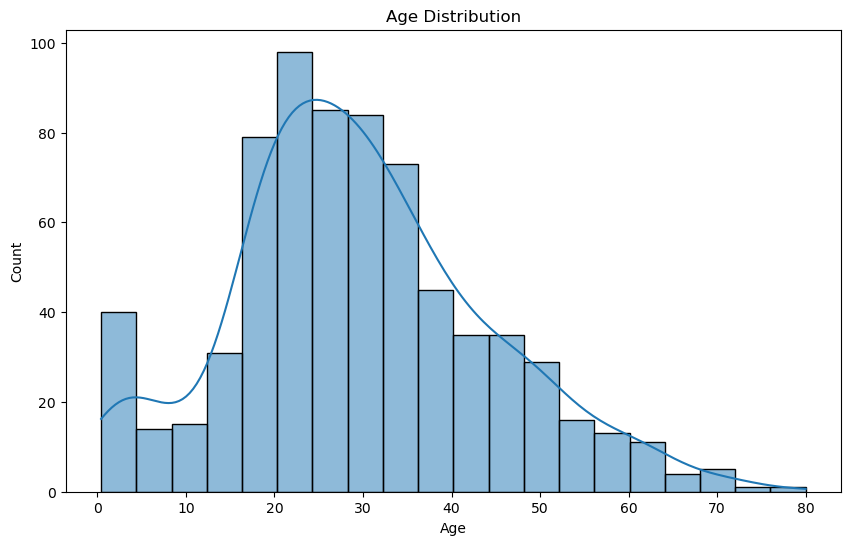

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

##### Statistics for PClass

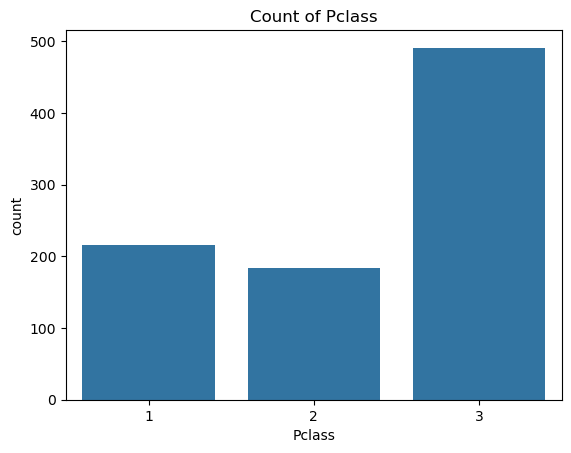

In [30]:
sns.countplot(x='Pclass', data=train_df)
plt.title('Count of Pclass')
plt.show()
    

##### Statistics for Fare

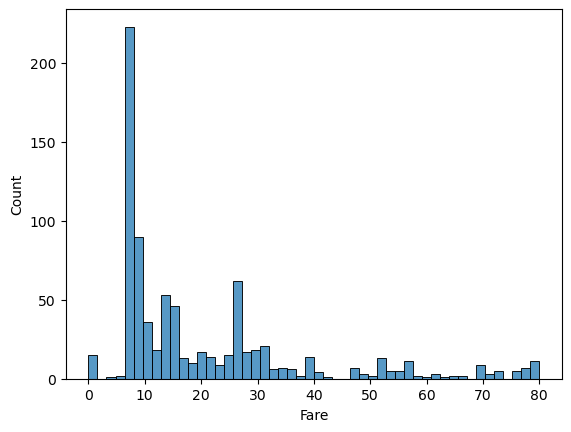

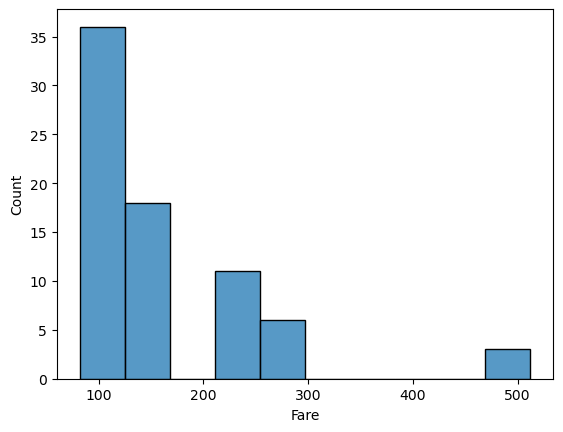

In [31]:
fare = train_df['Fare']
sns.histplot(bins=50, data=fare[fare <= 80])
plt.show()

fare = train_df['Fare']
sns.histplot(bins=10, data=fare[fare > 80])
plt.show()


##### Statistics for Gender

In [32]:
print(train_df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


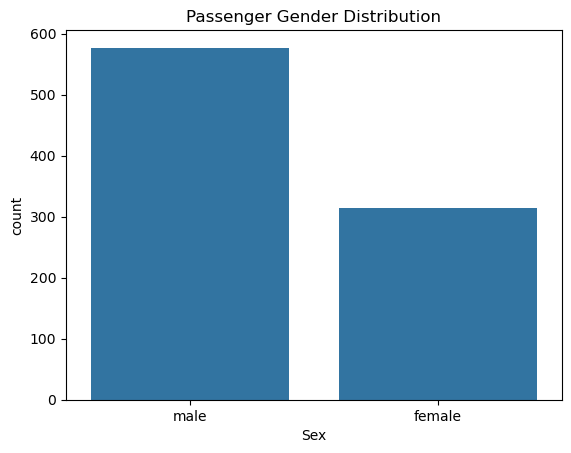

In [33]:
sns.countplot(x='Sex', data=train_df)
plt.title('Passenger Gender Distribution')
plt.show()

## Bivariate Analysis

##### Statistics Survival by Age & Sex & Pclass

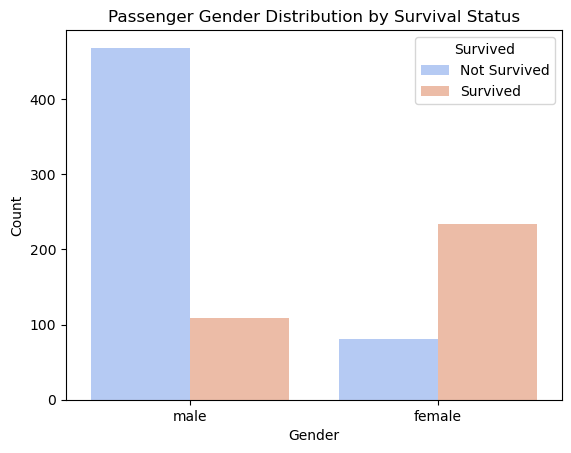

In [34]:
# Survival by Gender
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='coolwarm', hue_order=[0, 1])
plt.title('Passenger Gender Distribution by Survival Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

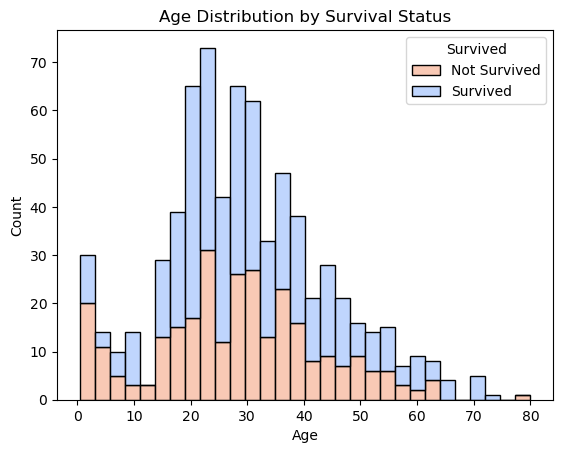

In [35]:
# Survival by Age
sns.histplot(data=train_df, x='Age', hue='Survived', palette='coolwarm', hue_order=[0, 1], multiple='stack', bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

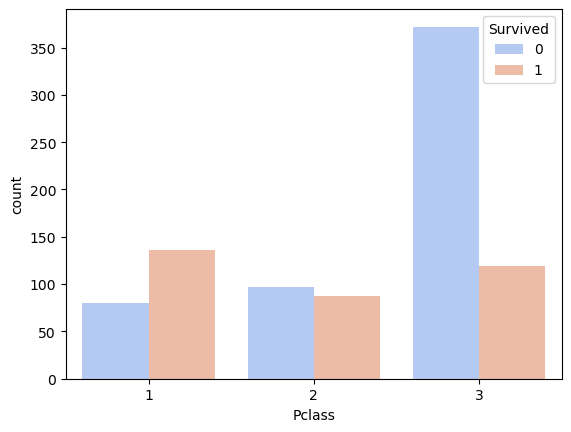

In [36]:
# Nr of Survived based on PClass
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='coolwarm', hue_order=[0, 1])
plt.show()

## Multivariate

In [37]:
# Correlation matrix
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

# Male = 0 
# Female = 1 
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
# test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

filtered = train_df[cols]
filtered.corr().style.background_gradient(cmap='coolwarm', axis=None).format(precision= 2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26,0.54
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55,-0.13
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10,-0.09
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16,0.11
Parch,0.08,0.02,-0.19,0.41,1.00,0.22,0.25
Fare,0.26,-0.55,0.10,0.16,0.22,1.00,0.18
Sex,0.54,-0.13,-0.09,0.11,0.25,0.18,1.00


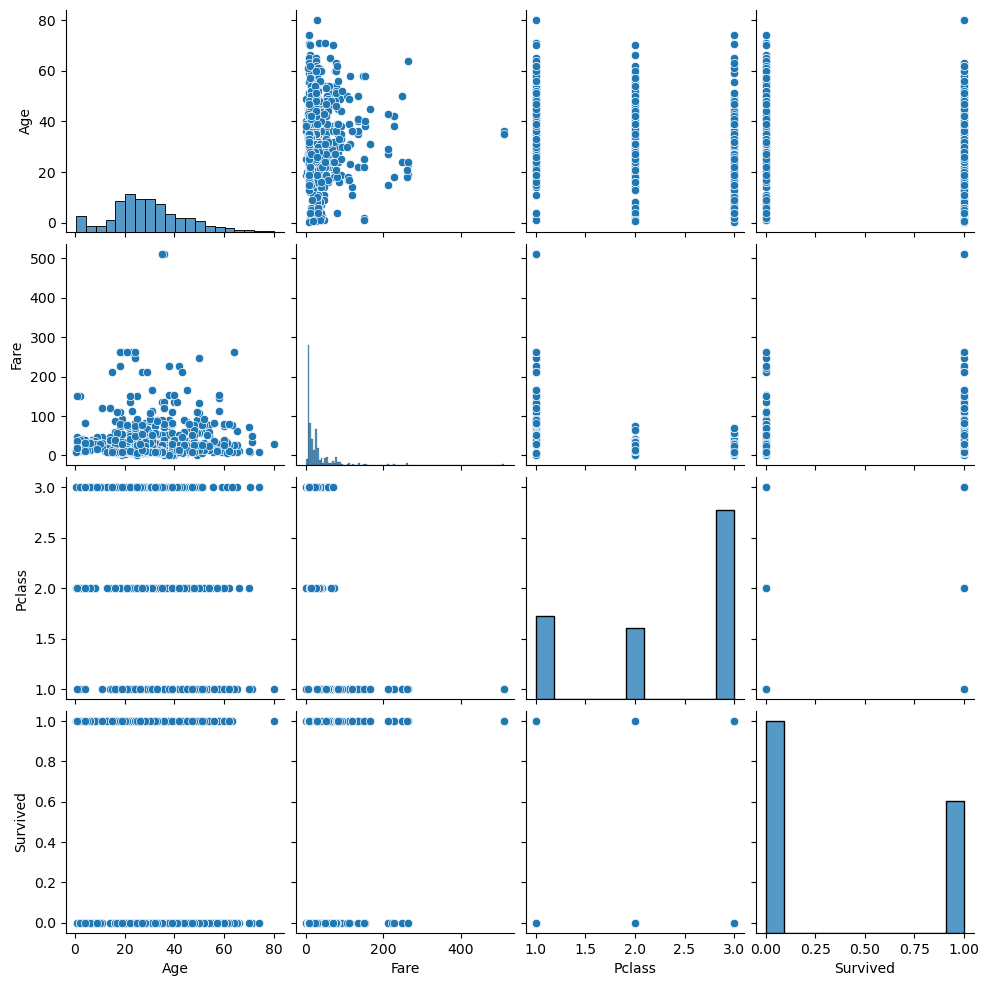

In [38]:
# Seaborn pairplot
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()

## Feature engineering

In [58]:
# Feature Engineering
# df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
# df2['IsAlone'] = (df2['FamilySize'] == 1).astype(int)
# df2['FarePerPerson'] = df2['Fare'] / df2['FamilySize']



0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64


## Model Training

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature Engineering & Selection
feature = ['Sex', 'Age', 'Pclass', 'Fare']

# Create a new dataframe with the selected features + Survived
model_df = train_df[feature + ['Survived']]

# One-hot encoding for Pclass
model_df = pd.get_dummies(model_df, columns=['Pclass'], drop_first=False)

# Replace the missing age values with the mean and drop the rows with missing values
model_df.loc[:, 'Age'] = model_df['Age'].fillna(model_df['Age'].mean())
model_df = model_df.dropna()
model_df.head(10)

# Splitting the data
## Separate features and target variable
X = model_df.drop('Survived', axis=1)  # Features
y = model_df['Survived']  # Target variable

# Training the model

# Predict the validation set

# Predict the test set

# Create a submission file
# testdummies = pd.get_dummies(test_df['Pclass'])
# test_df.join(testdummies)
# test_df["1"]


model_df.head()

,Sex,Age,Fare,Survived,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,False,False,True
1,1,38.0,71.2833,1,True,False,False
2,1,26.0,7.9250,1,False,False,True
3,1,35.0,53.1000,1,True,False,False
4,0,35.0,8.0500,0,False,False,True
